# **Outliers and Feature Engineering**

## Objectives

* Will take the cleaned dataset and check if there are any outliers for each country. Will also make a new dataframe that has the average rate of increase for each country

## Inputs

* cleaned_data.csv 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\sayed\\OneDrive\\Documents\\Code institute\\Capstone\\Capstone\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\sayed\\OneDrive\\Documents\\Code institute\\Capstone\\Capstone'

In [33]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the cleaned data
cleaned_data_path = 'c:\\Users\\sayed\\OneDrive\\Documents\\Code institute\\Capstone\\Capstone\\cleaned_data.csv'
cleaned_data = pd.read_csv(cleaned_data_path)

# Display the first few rows of the dataframe
print(cleaned_data.head())

  Country ISO3    Country  Year ISIC Division  \
0          ARG  Argentina  2000         10-12   
1          ARG  Argentina  2000         13-15   
2          ARG  Argentina  2000            16   
3          ARG  Argentina  2000         17-18   
4          ARG  Argentina  2000            19   

                                  ISIC Division Desc         Measure  \
0  Manufacture of food products, beverages and to...  Current prices   
1  Manufacture of textiles, wearing apparel, leat...  Current prices   
2  Manufacture of wood and of products of wood an...  Current prices   
3         Manufacture of paper products and printing  Current prices   
4  Manufacture of coke and refined petroleum prod...  Current prices   

   Value LCU (million national currency)  Value USD (million USD)  
0                               16986.10                  16994.6  
1                                5944.13                   5947.1  
2                                1551.72                   1552.5  


---

## Feature engineering

Now let us adjust some of the column names we have to make it easier for our analysis. We want to change ISO3 to 'Country code', 'ISIC Division' to 'Div Code', and 'ISIC Division description' to 'Division'

In [25]:
# Rename columns
cleaned_data.rename(columns={
    'Country ISO3': 'Country Code',
    'ISIC Division': 'Ind Code',
    'ISIC Division Desc': 'Industry'
}, inplace=True)

print(cleaned_data.head())

  Country Code    Country  Year Ind Code  \
0          ARG  Argentina  2000    10-12   
1          ARG  Argentina  2000    13-15   
2          ARG  Argentina  2000       16   
3          ARG  Argentina  2000    17-18   
4          ARG  Argentina  2000       19   

                                            Industry         Measure  \
0  Manufacture of food products, beverages and to...  Current prices   
1  Manufacture of textiles, wearing apparel, leat...  Current prices   
2  Manufacture of wood and of products of wood an...  Current prices   
3         Manufacture of paper products and printing  Current prices   
4  Manufacture of coke and refined petroleum prod...  Current prices   

   Value LCU (million national currency)  Value USD (million USD)  
0                               16986.10                  16994.6  
1                                5944.13                   5947.1  
2                                1551.72                   1552.5  
3                             

We noticed earlier that the 'Value' column had some negative values. This is fine in the context of our project as could indicate a few things: 

- A country is importing more than it is exporting
- A decline in that industry leading to losses i.e. negative growth
- Losses occured by foreign owned business in that industry. 

In [28]:
unique_measures = cleaned_data['Industry'].unique()
print(unique_measures)

['Manufacture of food products, beverages and tobacco products'
 'Manufacture of textiles, wearing apparel, leather and related products'
 'Manufacture of wood and of products of wood and cork, except furniture; manufacture of articles of straw and plaiting materials'
 'Manufacture of paper products and printing'
 'Manufacture of coke and refined petroleum products'
 'Manufacturing of chemicals and pharmaceutical products'
 'Manufacture of rubber and plastics products'
 'Manufacture of other non-metallic mineral products'
 'Manufacture of basic metals'
 'Manufacture of fabricated metal products, machinery and equipment'
 'Manufacture of transport equipment'
 'Manufacture of furniture, other manufacturing']


Looking at the data, there isn't any obvious short form words or abbreviations I can use to describe each industry so I will just be using the letters A-L, and the user can refer to a reference list to see what each letter represents

In [29]:
unique_measures = cleaned_data['Ind Code'].unique()
print(unique_measures)

['10-12' '13-15' '16' '17-18' '19' '20-21' '22' '23' '24' '25-28' '29-30'
 '31-32']


In [30]:
# Mapping dictionary
ind_code_mapping = {
    '10-12': 'A',
    '13-15': 'B',
    '16': 'C',
    '17-18': 'D',
    '19': 'E',
    '20-21': 'F',
    '22': 'G',
    '23': 'H',
    '24': 'I',
    '25-28': 'J',
    '29-30': 'K',
    '31-32': 'L'
}

# Replace 'Div Code' values
cleaned_data['Ind Code'] = cleaned_data['Ind Code'].replace(ind_code_mapping)

print(cleaned_data.head())

  Country Code    Country  Year Ind Code  \
0          ARG  Argentina  2000        A   
1          ARG  Argentina  2000        B   
2          ARG  Argentina  2000        C   
3          ARG  Argentina  2000        D   
4          ARG  Argentina  2000        E   

                                            Industry         Measure  \
0  Manufacture of food products, beverages and to...  Current prices   
1  Manufacture of textiles, wearing apparel, leat...  Current prices   
2  Manufacture of wood and of products of wood an...  Current prices   
3         Manufacture of paper products and printing  Current prices   
4  Manufacture of coke and refined petroleum prod...  Current prices   

   Value LCU (million national currency)  Value USD (million USD)  
0                               16986.10                  16994.6  
1                                5944.13                   5947.1  
2                                1551.72                   1552.5  
3                             

In [31]:
unique_measures = cleaned_data['Ind Code'].unique()
print(unique_measures)

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L']


---

Next let us make a new dataframe which has the growth rate for each industry in each country in both percentage and in currency format

In [32]:
# Calculate the average growth rate for each industry in each country
growth_data = cleaned_data.copy()

# Calculate the percentage growth
growth_data['Percentage Growth'] = growth_data.groupby(['Country Code', 'Ind Code'])['Value USD (million USD)'].pct_change() * 100

# Calculate the average growth rate in percentage
avg_growth_percentage = growth_data.groupby(['Country Code', 'Ind Code'])['Percentage Growth'].mean().reset_index()

# Calculate the average growth rate in Value LCU and Value USD
avg_growth_value = growth_data.groupby(['Country Code', 'Ind Code'])[['Value LCU (million national currency)', 'Value USD (million USD)']].mean().reset_index()

# Merge the dataframes
avg_growth = pd.merge(avg_growth_percentage, avg_growth_value, on=['Country Code', 'Ind Code'])

# Display the result
print(avg_growth.head())

  Country Code Ind Code  Percentage Growth  \
0          ARG        A           5.282971   
1          ARG        B           1.624143   
2          ARG        C           0.857627   
3          ARG        D           3.276011   
4          ARG        E           3.821795   

   Value LCU (million national currency)  Value USD (million USD)  
0                          161984.815789             20946.710526  
1                           37215.919474              5555.289474  
2                            7718.663158              1187.010526  
3                           32528.681579              4534.084211  
4                           23140.300000              3220.352632  


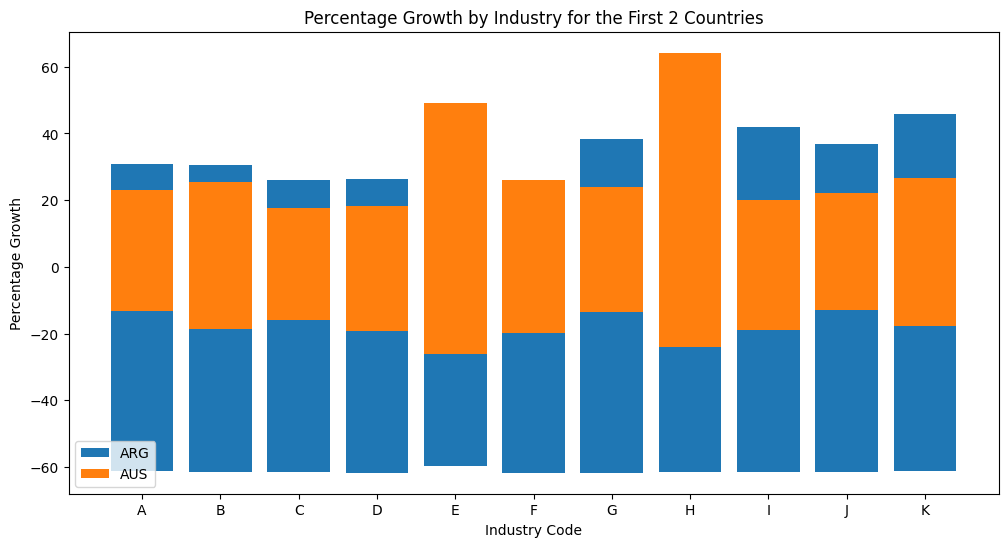

In [35]:
# Filter the data for the first 2 countries
first_2_countries = growth_data[growth_data['Country Code'].isin(first_3_codes[:2])]

# Plot the data
plt.figure(figsize=(12, 6))
for country in first_2_countries['Country Code'].unique():
    country_data = first_2_countries[first_2_countries['Country Code'] == country]
    plt.bar(country_data['Ind Code'], country_data['Percentage Growth'], label=country)

plt.xlabel('Industry Code')
plt.ylabel('Percentage Growth')
plt.title('Percentage Growth by Industry for the First 2 Countries')
plt.legend()
plt.show()